# Grafiken und Visualisierung

Visualisierung ist komplex und ist daher nicht klar kategorisierbar. Wir unternehmen den Versuch und schauen uns verschiedene mathematische Funktionen und ihre Visualisierung an.

Wir verwenden die Module 

- *matplotlib* : 2D
- *mayavi*: 3D interaktiv 

In [1]:
from numpy import linspace, pi, sin, cos
import matplotlib.pyplot as plt

### einfaches Beispiel

In [1]:
x = linspace(-pi, pi, 100)

In [1]:
plt.plot(x, sin(x))

`plt.plot` gibt die Liste der gezeichneten Graphen als Objekte vom Typ `Line2D` zurück, zeigt die Plots aber normalerweise nicht direkt an.

## Anzeigen der Plots

```python
plt.show()
```

stellt den plot standardmäßig im Notebook ```inline``` dar.


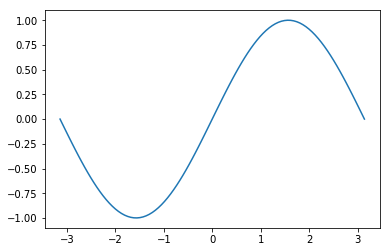

In [1]:
plt.show()

### verschiedene backends

```python
%matplotlib <backend>
```

Dieser Jupyter-spezifische Befehl muss nur einmal ausgeführt werden. Backends:
- `inline`: zeigt Grafiken im Notebook direkt an.
- `notebook`: zeigt Grafiken im Notebook direkt und interaktiv an.
- `qt`, `gtk`, `wx`, `tk`, `osx`: Backends für die Konsole, die jeweils ein Grafik-Fenster öffnen (ohne den Python-Interpreter anzuhalten). Die Wahl des Backends ist plattform-abhängig. `%matplotlib` allein wählt ein Standard-Backend.

*Anmerkung*: Allgemein hat `matplotlib` immer eine *aktuelle* Grafik (Typ `Figure`), in die gezeichnet wird. Beim `notebook` Backend ist das die letzte ausgegebene Grafik, bei anderen das letzte verwendete Fenster.

In [1]:
%matplotlib inline

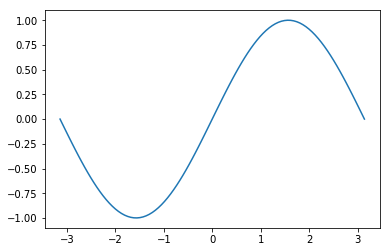

In [1]:
plt.plot(x, sin(x))

standardmäßig werden alle `plot`-Befehle innerhalb einer Zelle in die gleiche Grafik gezeichnet.

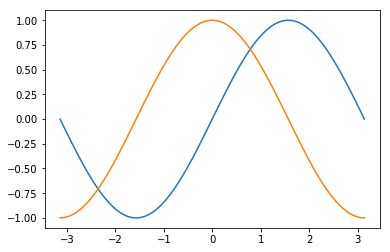

In [1]:
plt.plot(x, sin(x))
plt.plot(x, cos(x))

In [1]:
%matplotlib qt

In [1]:
plt.plot(x, sin(x))
plt.show()

**Achtung:** `plt.show` beim QT-Backend ist in erster Linie zur Verwendung in interaktiven  gedacht. Der Funktionsaufruf kehrt erst zurück, wenn das Plot-Fenster geschlossen wird. Voher können keine weiteren Befehle ausgeführt werden.


### Styles

Die Darstellung von Grafiken hat viele Variationen und Einstellungen. Diese sind in sogenannten *styles* gespeichert.
Solche *styles* sind dafür da, die Grafiken den subjektiven Empfinden und den Umständen anzupassen. 

``` python
plt.style.available
```

enthält alle vordefinierte Styles. Man kann auch eigene definieren (siehe Dokumentation).

In [1]:
print(plt.style.available)

['seaborn-notebook', 'seaborn-bright', 'seaborn-muted', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-paper', 'seaborn-pastel', 'bmh', 'ggplot', 'fivethirtyeight', 'dark_background', 'classic', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-poster', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-white', 'grayscale']


Styles können mit `plt.style.use` verwendet werden. Styles schließen sich nicht gegenseitig aus. Z.B. vergrößert `seaborn-poster` den Plot, `seaborn-whitegrid` fügt ein Gitternetz ein.

In [1]:
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

dann wird obiger plot zu

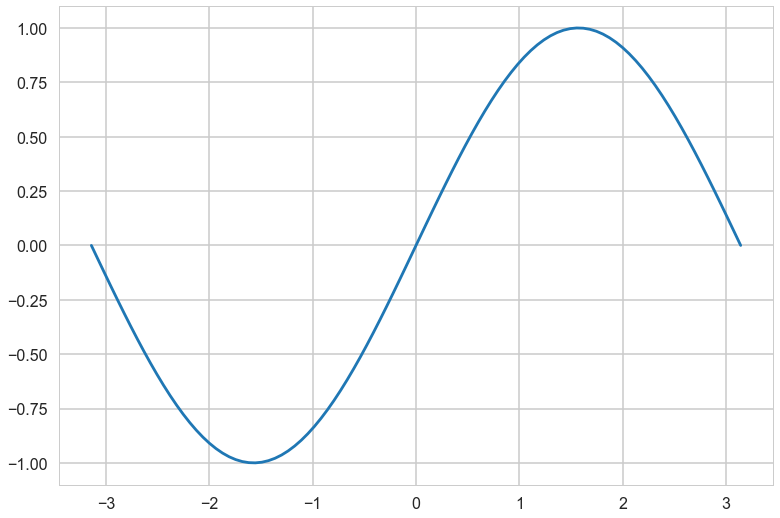

In [1]:
plt.plot(x, sin(x))
plt.show()

## Funktionen $\mathbb{R} \to \mathbb{R}$

### x-y-Plots

```python
plt.plot([x], y, [linestyle], [options...])
plt.plot(x1, y1, [linestyle1], x2, y2, [linestyle2], ..., [options...])
```

*Line styles* sind Strings, die bestimmen, wie der jeweilige Graph gezeichnet wird. Beispiele:

- `'bo--'`: blau (`b`), Punkte als Kreise (`o`), Linien gestrichelt (`--`)
- `'r:'`: rot (`r`), gepunktete Linie (`:`)

Eine Auswahl von *options*:

- *label=''* : Bezeichnung
- *color=black* : Farbe
- *linewidth=1* : Breite der Linie
- *linestyle='--'* : Stil der Linie

Die vollständige Liste gibt es in Jupyter mit
```
plt.plot?
```

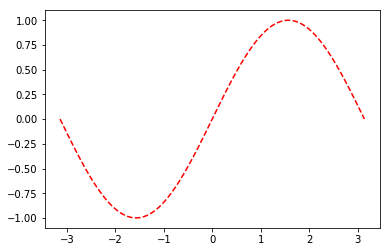

In [1]:
x = linspace(-pi, pi, 100)
plt.plot(x, sin(x), 'r--')
plt.show()

In [1]:
plt.plot?

#### Logarithmische Plots

```python
plt.semilogx
plt.semilogy
plt.loglog
```
Die Optionen sind dieselben wie für `plt.plot`.

### Plot-Optionen

#### Titel


```python
plt.title(string)
```

Setzt den Titel der Grafik auf *string*

#### Achsenbeschriftungen

```python
plt.xlabel(st)
plt.ylabel(st)
```
Setzt die Beschriftung der jeweiligen Achse auf *st*.


#### Legende

``` python
plt.legend(loc=<location>)
```

#### Darstellungsbereich

```python
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
```

Setzt die Achsen-Grenzen für $x$ und $y$ respektive.

#### Tick marks

``` python
plt.xticks(ticks)
plt.yticks(ticks)
```

*ticks* ist eine Liste von tick-marks für die jeweilige Achse.



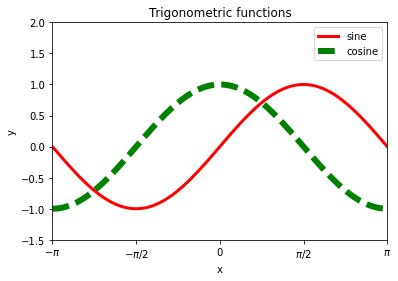

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace, pi, sin, cos

x = linspace(-pi, pi, 100)
plt.plot(x, sin(x), label="sine", color="red", linewidth=3, linestyle="-")
plt.plot(x, cos(x), label="cosine", color="green", linewidth=6, linestyle="--")
plt.title("Trigonometric functions")
plt.xlim(-pi, pi)
plt.ylim(-1.5, 2)
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([-pi, -pi/2, 0, pi/2, pi],('$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'))
plt.legend(loc='upper right')
plt.show()

## Punktdaten

### Scatter-Plots

Scatter plots sind *frei verteilte Punkte*

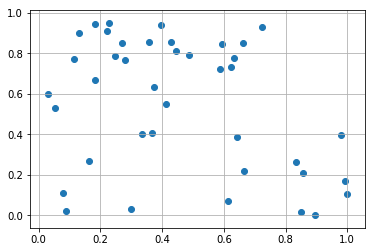

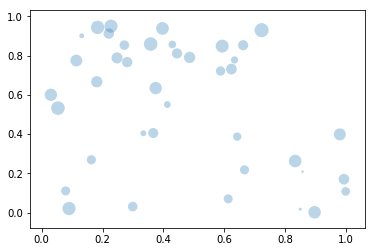

In [1]:
from numpy.random import rand
n = 40
x, y = rand(2, n)
plt.scatter(x, y)
plt.grid(True)

plt.figure()
scale = 200.0 * rand(n)
plt.scatter(x, y, s=scale, alpha=0.3, edgecolors='none')
plt.show()

## Funktionen $\mathbb{R} \to \mathbb{R}^2$

### Parametrische Plots

Parameterdarstellung 2d linie:
$$\{(x(t),y(t)) \in \mathbb{R}^2 \;|\; t \in [a,b]\}.$$

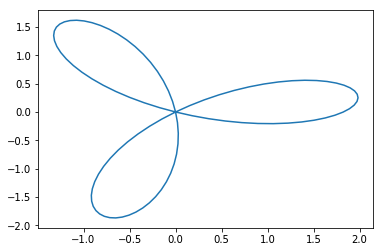

In [1]:
def func(t, alpha, beta):
    # Funktion gibt Koordinaten-Tupel zurück
    return alpha*sin(t+beta)*sin(3*t), alpha*cos(t+beta)*sin(3*t)

alpha = 2
beta = 3
# `*` fügt die beiden Elemente des Rückgabewertes als separate Argumente ein
plt.plot(*func(linspace(0, pi, 100), alpha, beta))
plt.show()

## Funktionen $\mathbb{R}^2 \to \mathbb{R}$

## Grid-Erzeugung

Für 2d- und 3d-Plots werden oft Koordinaten-Gitter benötigt.

### Reguläre Gitter

Mit *regulär* ist gemeint, dass die Punkte entlang er Achsen äquidistant sind. Wegen *Broadcasting* genügt es oft, nur die Achsen des Gitters zu erzeugen anstatt das gesamte Gitter, also Arrays, die nur entlang einer Dimension eine Länge größer 1 haben.

#### Achsen-Arrays
```python
X, Y, ... = np.ogrid[startx:stopx:stepx, starty:stopy:stepy, ...]
```
`ogrid` ist eine Funktion, die ungewöhnlicherweise durch "Indizieren" aufgerufen wird. `start`, `stop` und `step` haben ähnliche Bedeutung wie für Slices, aber *erzeugen* Koordinaten-Achsen, anstelle Teilarrays zu extrahieren.

In [1]:
from numpy import ogrid
x, y = ogrid[0:6:1, 0:50:10]
print((x.shape, y.shape))
(x, y)

((6, 1), (1, 5))


(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]), array([[ 0, 10, 20, 30, 40]]))

Anwendung durch Broadcasting: liefert alle Kombinationen aus Elementen in `x` und `y`:

In [1]:
x + y

array([[ 0, 10, 20, 30, 40],
       [ 1, 11, 21, 31, 41],
       [ 2, 12, 22, 32, 42],
       [ 3, 13, 23, 33, 43],
       [ 4, 14, 24, 34, 44],
       [ 5, 15, 25, 35, 45]])

`step` kann auch *imaginär* sein; in dem Fall verhält sich `ogrid` ähnlich wie `linspace`, d.h. die Anzahl der Punkte ist festgelegt, nicht die Schrittweite:

In [1]:
ogrid[0:13:3j, 0:13:3]

[array([[  0. ],
        [  6.5],
        [ 13. ]]), array([[  0.,   3.,   6.,   9.,  12.]])]

#### Broadcasting
```python
X, Y, ... = np.broadcast_arrays(x, y, ...)
```

Manchmal werden nicht nur die Achsen, sondern volle Koordinaten-Arrays benötigt. Insbesondere `matplotlib`-Funktionen verhalten sich oft so. Eine Möglichkeit ist es, das Broadcasting "vorzuberechnen" mit `broadcast_arrays`:

In [1]:
from numpy import broadcast_arrays
x, y = ogrid[0:6:1, 0:50:10]
x, y = broadcast_arrays(x, y)
print(x)
print(y)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
[[ 0 10 20 30 40]
 [ 0 10 20 30 40]
 [ 0 10 20 30 40]
 [ 0 10 20 30 40]
 [ 0 10 20 30 40]
 [ 0 10 20 30 40]]


Dabei werden, wie beim Broadcasting, keine Kopien gemacht. Schreiben in die Arrays hat also unerwünschte Effekte:

In [1]:
x[0, 0] = -1
x

array([[-1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5]])

Alternativ gibt es `numpy.mgrid`, das wie `ogrid` verwendet wird, aber volle Arrays erzeugt. Diese verbrauchen aber auch entrsprechend mehr Speicher und sind allgemein ineffizienter.

In [1]:
from numpy import mgrid
x, y = mgrid[0:6:1, 0:50:10]
print((x.shape, y.shape))

((6, 5), (6, 5))


### Nicht-äquidistante Gitter

Auch hier gibt es eine Broadcasting- und eine volle Variante.

#### Achsen-Arrays
```python
X, Y, ... = np.ix_(x, y, ...)
```

`ix_` verhält sich wie `ogrid`, wird allerdings wie eine normale Funktion aufgerufen akzeptiert statt `start:stop:step`-Ausdrücken beliebige Koordinaten-Arrays als Parameter.

In [1]:
from numpy import ix_, array
x, y = ix_(array([1, 3, 5]), array([0, 1, 3, 6]))
print(x)
print(y)

[[1]
 [3]
 [5]]
[[0 1 3 6]]


#### `meshgrid`

`meshgrid` wird einem mal über den Weg laufen, weil es aus Kompatibilitäts-Gründen existiert (nachgemacht von der MATLAB-Funktion gleichen Namens). Es erzeugt volle Arrays.

**Achtung:** der `indexing`-Parameter für `meshgrid` hat aus historischen Gründen den Wert `'xy'`, der dafür sorgt dass die ersten beiden Achsen vertauscht werden:

In [1]:
from numpy import arange, meshgrid
x, y, z = meshgrid(arange(5), arange(6), arange(7))
print((x.shape, y.shape, z.shape))

((6, 5, 7), (6, 5, 7), (6, 5, 7))


In [1]:
x, y, z = meshgrid(arange(5), arange(6), arange(7), indexing='ij')
print((x.shape, y.shape, z.shape))

((5, 6, 7), (5, 6, 7), (5, 6, 7))


Das ist inkonsistent mit dem Verhalten der anderen Funktionen! Generell sollte `meshgrid` nur in notwendigen Fällen verwendet werden, auch wenn es in vielen Online-Beispielen auftaucht.

### 2d-Bilder / Dichte-Bilder

Funktionswert wird auf dem Intervall $(x,y) \in [a,b] \times [c,d]$ als Farbe dargestellt

``` python
plt.imshow(daten, options,...)
```

- *daten*: typischerweise 2D-Arrays. 
- *options*: Optionen wie z.B. colormap (*cmap*): Eine Abbildung der Werte auf Farben.

Plot von $f(x,y)=(1 - x/2 + x^5 + y^3) e^{-(x^2 + y^2)}$:  


In [1]:
from numpy import exp, ogrid
x, y = ogrid[-3:3:300j, -3:3:300j]
z = (1 - x/2 + x**5 + y**3) * exp(-(x**2 + y**2))

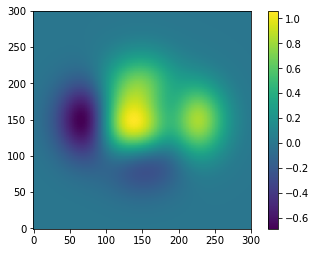

In [1]:
plt.imshow(z.T, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

### colormaps

Wie oben kurz erwähnt sind colormaps Abbildungen von Werten auf eine Farbe, so dass unser Auge damit was anfangen kann.

So eine Abbildung von Werten auf Farben ist nicht trivial, im Wesentlichen aufgrund dessen wie unser Auge Farben wahrnimmt. Man kann dadurch verschiedene Aspekte seiner Daten hervorheben oder auch verstecken. 

Im obigen Beispiel haben wir eine spezifische colormap genutzt (```'viridis'```) die einer möglichst lineare Farbdarstellung entspricht und die Intensität möglichst glatt ist (das ist auch der die Standard-colormap). 
Damit soll eine möglichst breite Anwendbarkeit gegeben sein und es ist eine colormap die erstmal keine Verzerrung der Daten erzeugt. 

Für spezifische Daten lohnt es sich auf jeden Fall darüber nachzudenken was man mit der Farbe erreichen will, also z.B. 

* bestimmte Wert-Gebiete hervorzuheben oder 
* Um einen bestimmten Wert herum +/- Werte hervorzuheben (diverging colormaps)


[choosing colormaps](https://matplotlib.org/users/colormaps.html)

[liste der colormaps](http://matplotlib.org/examples/color/colormaps_reference.html)

### Kontur-Plots

*Niveaulinien* (z.B. Höhenmeter auf einer Landkarte):

$$\{(x,y) \in \mathbb{R}^2 \;|\; f(x,y)=c, c \in \mathbb{R}\}$$  

``` python
plt.contour(x, y, z, [options])
```

Mit der option contours kann man die range und Anzahl der Konturlinien angeben.

*Beispiel*: Zeichnen der Niveaulinien  

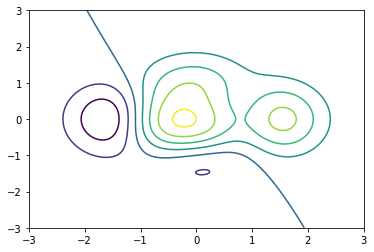

In [1]:
X, Y = broadcast_arrays(x, y)
c = plt.contour(X, Y, z); plt.show()

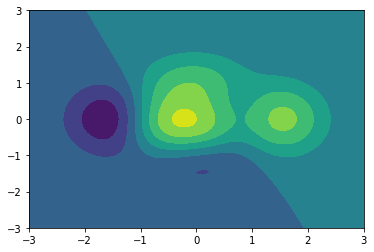

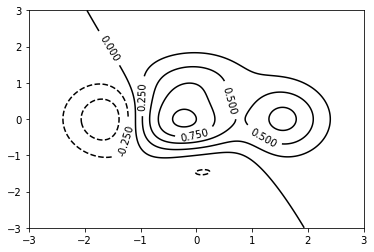

In [1]:
plt.contourf(X, Y, z)
plt.figure()
c = plt.contour(X, Y, z, colors='black')
plt.clabel(c, inline=1, fontsize=10)
plt.show()

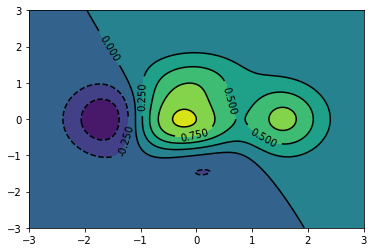

In [1]:
plt.contourf(X, Y, z)
c = plt.contour(X, Y, z, colors='black')
plt.clabel(c, inline=1, fontsize=10)
plt.show()

### Vektorfelder $\mathbb{R}^2 \rightarrow \mathbb{R^2}$

Funktionen die in jedem Punkt einen Vektor mit einer Richtung und einer Stärke haben.

``` python
plt.streamplot(X, Y, U, V, color=var)
```

erzeugt einen Vektor-Plot über X, Y Daten. Die Vektoren sind definiert über U und V. 

- *color:* die Variable die für die Farb-Abbildung der Vektoren genommen wird.


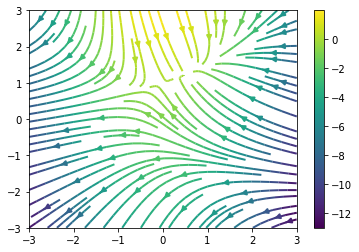

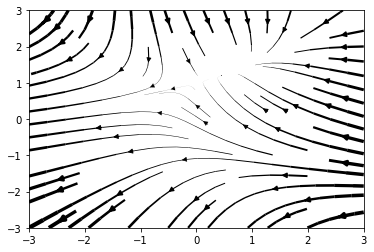

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.ogrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

strm = plt.streamplot(X, Y, U, V, color=U, linewidth=2)
plt.colorbar()

plt.figure()
lw = 5*speed / speed.max()
plt.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()